In [20]:
import numpy as np


In [27]:
# network size N
N = 8
## start out with no infectious individuals
X = np.zeros(N)

## edge matrix 
E = np.array([[0,2],
              [1,2],
              [2,3],
              [2,4],
              [3,6],
              [5,3],
              [3,4],
              [4,7],
              [4,6]])

## number of edges
M = np.shape(E)[0]

## infection rate
b = 1.2

## initialize time
T = 0
## choose Tmax
Tmax = 5

## initial condition
X[2] = 1


In [28]:
infected_no = np.sum(X)
timeSeries = [[T,infected_no]]

## the number of infected individuals can only ever change by 1 at any given time step (either -1, +1, or no change)
## rather than summing at each time step, ammend a counter instead
while T < Tmax:

    T += np.random.exponential(scale = 1/(N + b*M))

    if np.random.random() < N/(N + b*M):

        i = np.random.randint(N)

        if X[i] == 1:

            infected_no -= 1

        X[i] = 0

    else:

        i,j = E[np.random.randint(M)]

        if X[i] + X[j] == 1:

            infected_no += 1

        X[i] = X[j] = 1*(X[i] or X[j])

    timeSeries.append([T,infected_no])


[1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 4.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0]


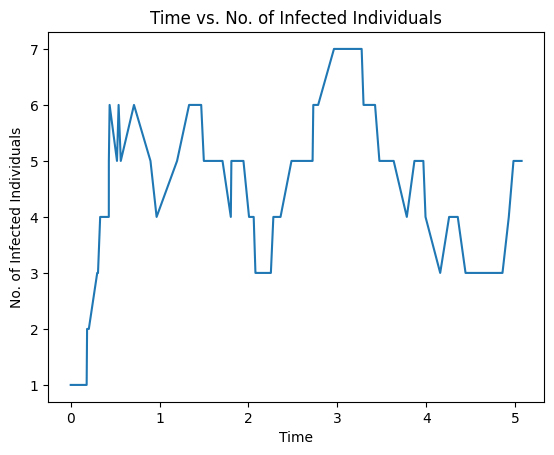

In [29]:
times = list(list(zip(*timeSeries))[0])
infected_no = list(list(zip(*timeSeries))[1])

print(infected_no)
import matplotlib.pyplot as plt

plt.plot(times, infected_no)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()


In [3]:
## algorithm with stylistic changes, inefficient because of the np.sum()
timeSeries = [[T,np.sum(X)]]

while T < Tmax:

    T += np.random.exponential(scale = 1/(N + b*M))

    if np.random.random() < N/(N + b*M):

        X[np.random.randint(N)] = 0

    else:

        i,j = E[np.random.randint(M)]

        X[i] = X[j] = (X[i] or X[j])

    timeSeries.append([T,np.sum(X)])


In [10]:
print(timeSeries)


[[0, 1.0], [0.05289505007463637, 1.0], [0.13665096616159284, 1.0], [0.21694718576775857, 2.0], [0.2192644572378114, 3.0], [0.24263882548968657, 3.0], [0.26550727220565296, 3.0], [0.2866950152056409, 4.0], [0.29210294728748565, 4.0], [0.292105049642982, 4.0], [0.4485736662215607, 5.0], [0.5183314473456124, 5.0], [0.6249949480461053, 4.0], [0.6828388890201063, 4.0], [0.6855453773143233, 4.0], [1.0481747618769672, 5.0], [1.1219467099318687, 5.0], [1.1327125798354407, 5.0], [1.2000902480237805, 6.0], [1.2118515005680377, 6.0], [1.3085065105597193, 6.0], [1.3555733361661748, 6.0], [1.4827769726824866, 5.0], [1.5163548707315044, 5.0], [1.6137696923060787, 5.0], [1.623831625026551, 5.0], [1.6477098275355353, 5.0], [1.6999006377129584, 6.0], [1.7333354030620574, 6.0], [1.7541726610721233, 5.0], [1.7809001266927278, 5.0], [1.834498292075772, 4.0], [1.877321061851214, 4.0], [1.9695359122498133, 3.0], [1.969931234174121, 2.0], [2.186339565630049, 3.0], [2.255097750719563, 3.0], [2.273781497163253